In [2]:
# Import all the needed libraries
import pyterrier as pt
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import algos
import os
if not pt.started():
    pt.init()

PyTerrier 0.8.0 has loaded Terrier 5.6 (built by craigmacdonald on 2021-09-17 13:27)



In [3]:
# Load the dataset
dataset = pt.datasets.get_dataset("trec-deep-learning-passages")

In [4]:
index_ref = pt.IndexRef.of(os.getcwd() + "./passage_index/data.properties")

In [5]:
index = pt.IndexFactory.of(index_ref)

08:54:28.638 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 1,9 GiB of memory would be required.


In [6]:
bm25 = pt.BatchRetrieve(index, wmodel="BM25")

In [7]:
qrels = dataset.get_qrels("test-2019")
res = algos.get_all_scores(dataset, bm25)

08:54:28.776 [main] WARN org.terrier.applications.batchquerying.TRECQuery - trec.encoding is not set; resorting to platform default (windows-1252). Retrieval may be platform dependent. Recommend trec.encoding=UTF-8


In [8]:
eval = pt.Utils.evaluate(res, qrels, metrics = ["recip_rank", "map", "ndcg"], perquery = True)

In [10]:
df1 = pd.read_csv("QueriesAllLengthScore.csv")

In [11]:
MAP = [eval[j]['map'] for j in eval]
ndcg = [eval[j]['ndcg'] for j in eval]

In [12]:
results = pd.DataFrame({"map":MAP,"ndcg":ndcg})[:-1]

In [13]:
df1['map'] = results['map']
df1['ndcg'] = results['ndcg']

In [15]:
df1.to_csv("QueriesAllLengthAllScore.csv", index=False)

In [16]:
df_map = pd.DataFrame({'map':df1['map'], 'query':df1['query']})
df_mrr = pd.DataFrame({'mrr':df1['mrr'], 'query':df1['query']})
df_ndcg = pd.DataFrame({'ndcg':df1['ndcg'], 'query':df1['query']})

In [17]:
# # Reorder it following the values:
# ordered_df = df_map.sort_values(by='map')[::-1]
# my_range=range(1,len(df_map.index)+1)

# K = 80
# space = K
# plt.figure(figsize=(10,20))

# # The horizontal plot is made using the hline function
# plt.hlines(y=my_range, xmin=0, xmax=ordered_df['map'], color='skyblue')
# plt.plot(ordered_df['map'], my_range, "o")
 
# # Add titles and axis names
# plt.yticks(my_range, ordered_df['query'])
# plt.title("The MAP value for each query with a qrel")
# plt.xlabel('MAP')
# plt.ylabel('Query')
# plt.tight_layout()
# plt.savefig('QueryVsMAP_lollipop.svg')

In [18]:
# # Reorder it following the values:
# ordered_df = df_mrr.sort_values(by='mrr')[::-1]
# my_range=range(1,len(df_map.index)+1)

# K = 80
# space = K
# plt.figure(figsize=(10,20))

# # The horizontal plot is made using the hline function
# plt.hlines(y=my_range, xmin=0, xmax=ordered_df['mrr'], color='skyblue')
# plt.plot(ordered_df['mrr'], my_range, "o")
 
# # Add titles and axis names
# plt.yticks(my_range, ordered_df['query'])
# plt.title("The MRR value for each query with a qrel")
# plt.xlabel('MRR')
# plt.ylabel('Query')
# plt.tight_layout()
# plt.savefig('QueryVsMRR_lollipop.svg')

In [19]:
# # Reorder it following the values:
# ordered_df = df_ndcg.sort_values(by='ndcg')[::-1]
# my_range=range(1,len(df_map.index)+1)

# K = 80
# space = K
# plt.figure(figsize=(10,20))

# # The horizontal plot is made using the hline function
# plt.hlines(y=my_range, xmin=0, xmax=ordered_df['ndcg'], color='skyblue')
# plt.plot(ordered_df['ndcg'], my_range, "o")
 
# # Add titles and axis names
# plt.yticks(my_range, ordered_df['query'])
# plt.title("The NDCG value for each query with a qrel")
# plt.xlabel('NDCG')
# plt.ylabel('Query')
# plt.tight_layout()
# plt.savefig('QueryVsNDCG_lollipop.svg')

In [21]:
df1 # this has all the queries with qrels, what we want to use!

,qid,mrr,query,doc_length,query_length,score,map,ndcg
0,156493,1.000000,do goldfish grow,90,3,31.156444,0.742523,0.930447
1,1110199,1.000000,what is wifi vs bluetooth,96,5,36.361917,0.141310,0.305252
2,1063750,0.333333,why did the us volunterilay enter ww1,100,7,30.340022,0.003193,0.031054
3,130510,1.000000,definition declaratory judgment,54,3,41.166240,0.851095,0.829239
4,489204,1.000000,right pelvic pain causes,50,4,38.213874,0.055242,0.322897
5,573724,0.500000,what are the social determinants of health,83,7,30.607432,0.580209,0.720437
6,168216,1.000000,does legionella pneumophila cause pneumonia,92,5,67.590115,0.792078,0.926795
7,1133167,1.000000,how is the weather in jamaica,101,6,33.297181,0.575266,0.697027
8,527433,1.000000,types of dysarthria from cerebral palsy,37,6,51.417216,0.064043,0.348880
9,1037798,0.333333,who is robert gray,90,4,30.522236,0.109533,0.433398


In [22]:
# Sort the relevancy score from best to worse and make sure that for each query only the most relevant document remains
def sorted_by_score():
    return df1.sort_values(by=['score'])[::-1].drop_duplicates(subset='qid').reset_index(drop=True)

In [23]:
# Retrieve the best top-k queries (aka these are queries that score best, highest relevancy, for all documents)
def retrieve_best_queries(k):
    return sorted_by_score()[:k]

In [24]:
# Retrieve the worst top-k queries (aka these are queries that score worst, lowest relevancy, for all documents)
def retrieve_worst_queries(k):
    return sorted_by_score()[42-k:]

In [25]:
retrieve_best_queries(1)

,qid,mrr,query,doc_length,query_length,score,map,ndcg
0,47923,1.0,axon terminals or synaptic knob definition,93,6,72.923054,0.225504,0.662187


In [26]:
pt.BatchRetrieve(index_ref).search(df1['query'].iloc[1])[0:1]['query']

08:55:03.300 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 1,9 GiB of memory would be required.


0    what is wifi vs bluetooth
Name: query, dtype: object

In [27]:
print(df1['query'].head(1).to_string(index=False))

do goldfish grow


In [28]:
# docno = []
# passages = []

# for q in df1['query'].tail(21):
#     docno.append(pt.BatchRetrieve(index_ref).search(q)[0:1]['docno'].to_string(index=False))

# for i in docno:    
#     passages.append(algos.search_with_doc_id(int(i)))

08:55:05.167 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 1,9 GiB of memory would be required.
08:55:06.986 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 1,9 GiB of memory would be required.
08:55:08.744 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 1,9 GiB of memory would be required.
08:55:10.389 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 1,9 GiB of memory would be required.
08:55:12.093 [main] WARN org.terrier.str

KeyboardInterrupt: 

Exception ignored in: 'jnius.invoke0'
Traceback (most recent call last):
  File "jnius\jnius_proxy.pxi", line 82, in jnius.py_invoke0
  File "<frozen importlib._bootstrap>", line 389, in parent
KeyboardInterrupt: 


08:55:22.044 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 1,9 GiB of memory would be required.
08:55:23.577 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 1,9 GiB of memory would be required.
08:55:25.127 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 1,9 GiB of memory would be required.
08:55:26.573 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 1,9 GiB of memory would be required.
08:55:28.158 [main] WARN org.terrier.str

KeyboardInterrupt: 

Exception ignored in: 'jnius.invoke0'
Traceback (most recent call last):
  File "jnius\jnius_proxy.pxi", line 82, in jnius.py_invoke0
  File "<frozen importlib._bootstrap>", line 389, in parent
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
# passages

In [ ]:
# passages_docno = pd.DataFrame({'docno':docno, 'passage': passages})

In [ ]:
# passages_docno

In [ ]:
# passages_docno.to_csv("docnoPassagesPart2s.csv",index=False)

In [ ]:
# passagesPart1 = pd.read_csv("docnoPassagesPart1s.csv")

In [ ]:
# frames = [passagesPart1, passages_docno]
# result = pd.concat(frames)
# result

In [ ]:
# result.to_csv("docnoPassagesPart1+2s.csv",index=False)

In [ ]:
# result.reset_index(level=0, inplace=True)
# df1['docno'] = result['docno']
# df1['passage'] = result['passage']
# df1.to_csv("docnoPassagesPart1+2sIndex.csv",index=False)
# df1

In [ ]:
# algos.search_with_doc_id(int(df1.iloc[0]['docno']))

In [40]:
df1 = pd.read_csv("docnoPassagesPart1+2sIndex.csv")


In [136]:
df1.tail(10)

,qid,mrr,query,doc_length,query_length,score,map,ndcg,docno,passage
32,87452,1.000000,causes of military suicide,49,4,31.898859,0.000239,0.016388,8819111,Suicide surpassed war as the military's leadin...
33,855410,1.000000,what is theraderm used for,67,5,25.624201,0.247845,0.445475,8651775,Theraderm Skin Renewal System. Theraderm Skin ...
34,1114646,0.500000,what is famvir prescribed for,85,5,27.466796,0.804167,0.881199,8117094,"looks like might be herpes, prescribed Famvir=..."
35,19335,1.000000,anthropological definition of environment,69,4,32.250450,0.453310,0.576011,8412687,Welcome to the Journal of Ecological Anthropol...
36,47923,1.000000,axon terminals or synaptic knob definition,93,6,72.923054,0.225504,0.662187,8348762,The junction between the axon terminals of a n...
37,405717,0.333333,is cdg airport in main paris,93,6,54.418470,0.405394,0.721171,2365660,From Aeroport Charles De Gaulle 2 Tgv train to...
38,182539,1.000000,example of monotonic function,105,4,41.730800,0.330586,0.637753,3760957,Note that just monotonic transformation of a c...
39,1113437,0.500000,what is physical description of spruce,77,6,29.356636,0.811010,0.851972,4981632,"Description: Douglas-fir trees, which are also..."
40,1129237,1.000000,hydrogen is a liquid below what temperature,101,7,32.949260,0.146926,0.496099,2697752,Hydrogen's state of matter is gas at standard ...
41,146187,1.000000,difference between a mcdouble and a double che...,84,8,65.216795,0.368085,0.692343,8434619,"At first glance, the double cheeseburger looks..."


In [67]:
# Get the top-k best performing, most relevant documents, according to the to the query that they match
def retrieve_best_docs(k):
    return df1.head(k)

In [68]:
retrieve_best_docs(10)

,qid,mrr,query,doc_length,query_length,score,map,ndcg,docno,passage
0,156493,1.000000,do goldfish grow,90,3,31.156444,0.742523,0.930447,2411918,Goldfish Size and Life Expectancy. If kept in ...
1,1110199,1.000000,what is wifi vs bluetooth,96,5,36.361917,0.141310,0.305252,8160520,Bluetooth vs. WiFi - Range: Maximum range for ...
2,1063750,0.333333,why did the us volunterilay enter ww1,100,7,30.340022,0.003193,0.031054,4788295,Best Answer: You need to check your time line-...
3,130510,1.000000,definition declaratory judgment,54,3,41.166240,0.851095,0.829239,7501563,Rule 57. These rules govern the procedure for ...
4,489204,1.000000,right pelvic pain causes,50,4,38.213874,0.055242,0.322897,1479542,LOWER Right Abdominal Pain. Lower right abdomi...
5,573724,0.500000,what are the social determinants of health,83,7,30.607432,0.580209,0.720437,3365633,Determinants of health are factors that contri...
6,168216,1.000000,does legionella pneumophila cause pneumonia,92,5,67.590115,0.792078,0.926795,3198687,"Legionnaires' disease, also known as legionell..."
7,1133167,1.000000,how is the weather in jamaica,101,6,33.297181,0.575266,0.697027,7093509,Jamaica Weather: Month-by-Month. Here's a mont...
8,527433,1.000000,types of dysarthria from cerebral palsy,37,6,51.417216,0.064043,0.348880,8617271,There are three major types of dysarthria in c...
9,1037798,0.333333,who is robert gray,90,4,30.522236,0.109533,0.433398,3641634,"Captain Robert Gray, May 1972. Discovering the..."


In [65]:
# Get the top-k wors performing, least relevant documents, according to the to the query that they match
def retrieve_worst_docs(k):
    return df1.tail(k)

In [44]:
retrieve_best_docs(10)

,qid,mrr,query,doc_length,query_length,score,map,ndcg,docno,passage
32,87452,1.000000,causes of military suicide,49,4,31.898859,0.000239,0.016388,8819111,Suicide surpassed war as the military's leadin...
33,855410,1.000000,what is theraderm used for,67,5,25.624201,0.247845,0.445475,8651775,Theraderm Skin Renewal System. Theraderm Skin ...
34,1114646,0.500000,what is famvir prescribed for,85,5,27.466796,0.804167,0.881199,8117094,"looks like might be herpes, prescribed Famvir=..."
35,19335,1.000000,anthropological definition of environment,69,4,32.250450,0.453310,0.576011,8412687,Welcome to the Journal of Ecological Anthropol...
36,47923,1.000000,axon terminals or synaptic knob definition,93,6,72.923054,0.225504,0.662187,8348762,The junction between the axon terminals of a n...
37,405717,0.333333,is cdg airport in main paris,93,6,54.418470,0.405394,0.721171,2365660,From Aeroport Charles De Gaulle 2 Tgv train to...
38,182539,1.000000,example of monotonic function,105,4,41.730800,0.330586,0.637753,3760957,Note that just monotonic transformation of a c...
39,1113437,0.500000,what is physical description of spruce,77,6,29.356636,0.811010,0.851972,4981632,"Description: Douglas-fir trees, which are also..."
40,1129237,1.000000,hydrogen is a liquid below what temperature,101,7,32.949260,0.146926,0.496099,2697752,Hydrogen's state of matter is gas at standard ...
41,146187,1.000000,difference between a mcdouble and a double che...,84,8,65.216795,0.368085,0.692343,8434619,"At first glance, the double cheeseburger looks..."


In [45]:
# import nltk
# nltk.download()

In [46]:
all_passages = ""

for p in df1['passage']:
    all_passages += p

In [47]:
all_words = all_passages.split()

In [48]:
all_words

['Goldfish',
 'Size',
 'and',
 'Life',
 'Expectancy.',
 'If',
 'kept',
 'in',
 'a',
 'suitable',
 'environment,',
 'single',
 'tail',
 'goldfish',
 'normally',
 'grow',
 'to',
 '10',
 'inches',
 '(25cm)',
 'and',
 'can',
 'sometimes',
 'reach',
 '12',
 'inches',
 '(30cm).',
 'Fancy',
 'goldfish',
 'normally',
 'grow',
 'to',
 '8',
 'inches',
 '(20cm).',
 'The',
 'normal',
 'life',
 'expectancy',
 'of',
 'a',
 'single',
 'tail',
 'goldfish',
 'is',
 'about',
 '20',
 'years.f',
 'kept',
 'in',
 'a',
 'suitable',
 'environment,',
 'single',
 'tail',
 'goldfish',
 'normally',
 'grow',
 'to',
 '10',
 'inches',
 '(25cm)',
 'and',
 'can',
 'sometimes',
 'reach',
 '12',
 'inches',
 '(30cm).',
 'Fancy',
 'goldfish',
 'normally',
 'grow',
 'to',
 '8',
 'inches',
 '(20cm).',
 'The',
 'normal',
 'life',
 'expectancy',
 'of',
 'a',
 'single',
 'tail',
 'goldfish',
 'is',
 'about',
 '20',
 'years.',
 'Bluetooth',
 'vs.',
 'WiFi',
 '-',
 'Range:',
 'Maximum',
 'range',
 'for',
 'Bluetooth',
 'based',

In [85]:
from collections import Counter

# Pass the split_it list to instance of Counter class.
Counter = Counter(all_words)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common()

In [86]:
len(most_occur)

1577

In [87]:
most_occur

[('the', 154),
 ('of', 129),
 ('and', 84),
 ('a', 83),
 ('to', 69),
 ('is', 66),
 ('in', 62),
 ('are', 51),
 ('or', 33),
 ('for', 30),
 ('that', 29),
 ('on', 27),
 ('The', 23),
 ('with', 22),
 ('be', 20),
 ('can', 19),
 ('as', 19),
 ('by', 13),
 ('1', 12),
 ('at', 12),
 ('not', 12),
 ('may', 12),
 ('up', 12),
 ('percent', 12),
 ('it', 11),
 ('your', 11),
 ('from', 10),
 ('2', 10),
 ('their', 9),
 ('its', 9),
 ('between', 9),
 ('an', 9),
 ('per', 9),
 ('In', 8),
 ('but', 8),
 ('also', 8),
 ('L.', 8),
 ('will', 8),
 ('this', 8),
 ('two', 8),
 ('concrete', 8),
 ('xylem', 8),
 ('function', 8),
 ('out', 7),
 ('Weather:', 7),
 ('was', 7),
 ('â\x80¢', 7),
 ('fat', 7),
 ('RSA', 7),
 ('down', 7),
 ('axon', 7),
 ('goldfish', 6),
 ('inches', 6),
 ('other', 6),
 ('which', 6),
 ('Russia', 6),
 ('These', 6),
 ('does', 6),
 ('There', 6),
 ('long', 6),
 ('â\x80\x93', 6),
 ('more', 6),
 ('stained', 6),
 ('stomach', 6),
 ('County,', 6),
 ('TPI', 6),
 ('billion,', 6),
 ('(x)', 6),
 ('sometimes', 5),
 ('a

In [88]:
# Removing stopwords

In [89]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

all_stopwords = stopwords.words('english')
sw_list = ['.',',','(',')',':','The','$','1', '2', '3', '4', '5', '6', '7', '8', '9', ';', "'s", '-', 'x', 'L.',"'", "'"]
all_stopwords.extend(sw_list)

text_tokens = word_tokenize(all_passages)

tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]

print(tokens_without_sw)

['Goldfish', 'Size', 'Life', 'Expectancy', 'If', 'kept', 'suitable', 'environment', 'single', 'tail', 'goldfish', 'normally', 'grow', '10', 'inches', '25cm', 'sometimes', 'reach', '12', 'inches', '30cm', 'Fancy', 'goldfish', 'normally', 'grow', 'inches', '20cm', 'normal', 'life', 'expectancy', 'single', 'tail', 'goldfish', '20', 'years.f', 'kept', 'suitable', 'environment', 'single', 'tail', 'goldfish', 'normally', 'grow', '10', 'inches', '25cm', 'sometimes', 'reach', '12', 'inches', '30cm', 'Fancy', 'goldfish', 'normally', 'grow', 'inches', '20cm', 'normal', 'life', 'expectancy', 'single', 'tail', 'goldfish', '20', 'years', 'Bluetooth', 'vs.', 'WiFi', 'Range', 'Maximum', 'range', 'Bluetooth', 'based', 'wireless', 'connections', '30m', 'Wi-Fi', 'extend', 'well', 'upto', '100m', 'In', 'Wi-Fi', 'range', 'depends', 'version', 'Wi-Fi', 'protocol', 'applied', 'addition', 'antennas', 'communication', 'system', 'concerns', 'range', 'extra', 'antenna', 'much', 'known', 'Bluetooth.', 'Bluetooth

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jbies\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [90]:
from collections import Counter

# Pass the split_it list to instance of Counter class.
Counter_st = Counter(tokens_without_sw)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur_st = Counter_st.most_common()

In [91]:
most_occur_st

[('may', 12),
 ('percent', 12),
 ('also', 9),
 ('per', 9),
 ('life', 8),
 ('In', 8),
 ('year', 8),
 ('Weather', 8),
 ('two', 8),
 ('concrete', 8),
 ('xylem', 8),
 ('function', 8),
 ('system', 7),
 ('â\x80¢', 7),
 ('cheese', 7),
 ('fat', 7),
 ('RSA', 7),
 ('axon', 7),
 ('CDG', 7),
 ('goldfish', 6),
 ('inches', 6),
 ('time', 6),
 ('Russia', 6),
 ('These', 6),
 ('health', 6),
 ('disease', 6),
 ('type', 6),
 ('There', 6),
 ('water', 6),
 ('long', 6),
 ('â\x80\x93', 6),
 ('stained', 6),
 ('stomach', 6),
 ('County', 6),
 ('TPI', 6),
 ('billion', 6),
 ('concave', 6),
 ('sometimes', 5),
 ('Wi-Fi', 5),
 ('known', 5),
 ("n't", 5),
 ('Jamaica', 5),
 ('It', 5),
 ('high', 5),
 ('season', 5),
 ('May', 5),
 ('...', 5),
 ('Columbia', 5),
 ('food', 5),
 ('hours', 5),
 ('conditions', 5),
 ('keep', 5),
 ('use', 5),
 ('=', 5),
 ('margins', 5),
 ('rates', 5),
 ('BSN', 5),
 ('first', 5),
 ('day', 5),
 ('sides', 5),
 ('medical', 5),
 ('encryption', 5),
 ('USSR', 5),
 ('capita', 5),
 ('personal', 5),
 ('incom

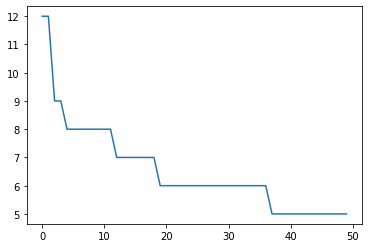

In [123]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
 
# create data
performance = [x[1] for x in most_occur_st[:50]]
 
# use the plot function
plt.plot(range(len(performance)),performance)

# show the graph
plt.show()

No handles with labels found to put in legend.


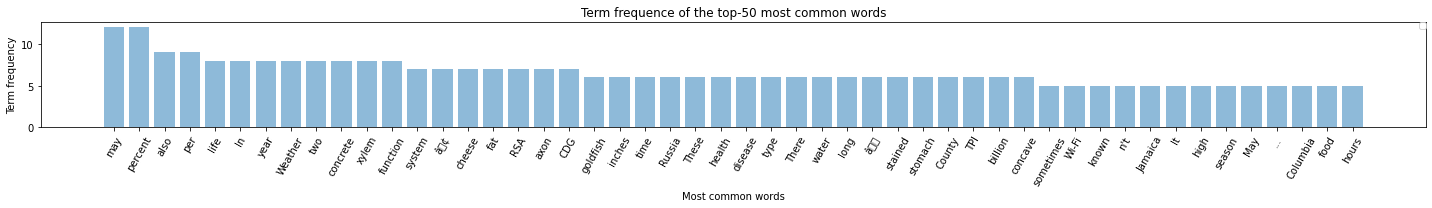

In [133]:
# make a plot of the top-k words in a bar chart for the time they occur
objects = [x[0] for x in most_occur_st[:50]]
y_pos = np.arange(len(objects))
performance = [x[1] for x in most_occur_st[:50]]
plt.figure(figsize=(20, 3))  # width:20, height:3
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Term frequency')
plt.xlabel('Most common words')
plt.title('Term frequence of the top-50 most common words')
plt.xticks(rotation=60)

import statistics
# plt.axhline(y=statistics.mean(performance), color='g', linestyle='--', label="Mean TF")

# Add legend
plt.legend(loc=1, fontsize='small', bbox_to_anchor=(1, 1), borderaxespad=0)
plt.tight_layout()
plt.savefig('top_50_common_words_and_mean_bar.svg')

In [92]:
import math 

df_topk = []

for doc in (df1['passage']):
    idf = []
    for w in most_occur_st[:10]:
        freq = doc.count(w[0])
        if freq != 0 :
            idf.append(round(math.log(42/freq),2))
        else:
            idf.append(0)
    df_topk.append(idf)

In [93]:
df_topk

[[0, 0, 0, 0, 3.04, 0, 3.04, 0, 0, 0],
 [0, 0, 0, 0, 0, 3.04, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 3.74, 0, 0, 0],
 [3.74, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [3.04, 0, 3.74, 3.74, 0, 0, 0, 0, 0, 0],
 [3.74, 0, 3.74, 3.74, 0, 0, 0, 0, 0, 0],
 [0, 0, 3.04, 0, 0, 0, 0, 0, 0, 0],
 [3.74, 0, 0, 3.74, 0, 0, 3.04, 1.66, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 3.74, 0, 0, 0],
 [3.74, 0, 0, 3.04, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 2.35, 0, 3.04, 0, 0, 0],
 [0, 0, 3.74, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 3.74, 0, 3.74, 0, 0, 0, 0],
 [0, 0, 3.74, 0, 0, 3.74, 0, 0, 3.74, 0],
 [3.04, 0, 0, 2.35, 0, 2.35, 3.74, 0, 0, 0],
 [0, 0, 0, 3.04, 3.04, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 2.35, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 3.74, 3.04, 3.74, 0, 0, 0, 0],
 [0, 0, 0, 3.04, 0, 3.04, 0, 0, 0, 1.66],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 3.04, 0, 3.04, 0, 0, 0],
 [0, 0, 0, 3.04, 0, 0, 0, 0, 0, 0],
 [3.04, 0, 0, 0, 3.04, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0,

In [1]:
an_array = np.array(df_topk)

NameError: name 'np' is not defined

In [ ]:
an_array

In [ ]:

fig, ax = plt.subplots()

# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.

ax.set_yticks(np.arange(len(list(df1['docno']))))
ax.set_xticks(np.arange(10))


ax.set_yticklabels(list(df1['docno']))

ax.set_xticklabels([x[0] for x in most_occur_st][:10])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor", fontsize = 10)

# Loop over data dimensions and create text annotations.
for i in range(len(list(df1['docno']))):
    for j in range(10):
        text = ax.text(j, i, an_array[i,j],
                       ha="center", va="center", color="w")

plt.tight_layout()
plt.show()

In [ ]:
len(list(df1['docno']))

In [ ]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


 
# plot heatmap
fig, ax = plt.subplots(figsize=(14, 9))


sns.heatmap(an_array, cmap='Blues')


ax.xaxis.tick_top()
ax.set_yticks(np.arange(len(list(df1['docno']))))
# ax.set_xticks(np.arange(10))


ax.set_yticklabels(list(df1['docno']))

ax.set_xticklabels([x[0] for x in most_occur_st][:10])

ax.set_xlabel('Most relevant document', fontsize=10)
ax.set_ylabel('Most common words', fontsize=10)


plt.show()
plt.savefig('heatmap_commonwords.svg')

In [78]:
best_passages = retrieve_best_docs(10)['passage']

In [135]:
retrieve_best_docs(10)

,qid,mrr,query,doc_length,query_length,score,map,ndcg,docno,passage
0,156493,1.000000,do goldfish grow,90,3,31.156444,0.742523,0.930447,2411918,Goldfish Size and Life Expectancy. If kept in ...
1,1110199,1.000000,what is wifi vs bluetooth,96,5,36.361917,0.141310,0.305252,8160520,Bluetooth vs. WiFi - Range: Maximum range for ...
2,1063750,0.333333,why did the us volunterilay enter ww1,100,7,30.340022,0.003193,0.031054,4788295,Best Answer: You need to check your time line-...
3,130510,1.000000,definition declaratory judgment,54,3,41.166240,0.851095,0.829239,7501563,Rule 57. These rules govern the procedure for ...
4,489204,1.000000,right pelvic pain causes,50,4,38.213874,0.055242,0.322897,1479542,LOWER Right Abdominal Pain. Lower right abdomi...
5,573724,0.500000,what are the social determinants of health,83,7,30.607432,0.580209,0.720437,3365633,Determinants of health are factors that contri...
6,168216,1.000000,does legionella pneumophila cause pneumonia,92,5,67.590115,0.792078,0.926795,3198687,"Legionnaires' disease, also known as legionell..."
7,1133167,1.000000,how is the weather in jamaica,101,6,33.297181,0.575266,0.697027,7093509,Jamaica Weather: Month-by-Month. Here's a mont...
8,527433,1.000000,types of dysarthria from cerebral palsy,37,6,51.417216,0.064043,0.348880,8617271,There are three major types of dysarthria in c...
9,1037798,0.333333,who is robert gray,90,4,30.522236,0.109533,0.433398,3641634,"Captain Robert Gray, May 1972. Discovering the..."


In [79]:
best_passages.to_csv("best_passages.csv",index=False)

In [80]:
retrieve_worst_docs(10)

,qid,mrr,query,doc_length,query_length,score,map,ndcg,docno,passage
32,87452,1.000000,causes of military suicide,49,4,31.898859,0.000239,0.016388,8819111,Suicide surpassed war as the military's leadin...
33,855410,1.000000,what is theraderm used for,67,5,25.624201,0.247845,0.445475,8651775,Theraderm Skin Renewal System. Theraderm Skin ...
34,1114646,0.500000,what is famvir prescribed for,85,5,27.466796,0.804167,0.881199,8117094,"looks like might be herpes, prescribed Famvir=..."
35,19335,1.000000,anthropological definition of environment,69,4,32.250450,0.453310,0.576011,8412687,Welcome to the Journal of Ecological Anthropol...
36,47923,1.000000,axon terminals or synaptic knob definition,93,6,72.923054,0.225504,0.662187,8348762,The junction between the axon terminals of a n...
37,405717,0.333333,is cdg airport in main paris,93,6,54.418470,0.405394,0.721171,2365660,From Aeroport Charles De Gaulle 2 Tgv train to...
38,182539,1.000000,example of monotonic function,105,4,41.730800,0.330586,0.637753,3760957,Note that just monotonic transformation of a c...
39,1113437,0.500000,what is physical description of spruce,77,6,29.356636,0.811010,0.851972,4981632,"Description: Douglas-fir trees, which are also..."
40,1129237,1.000000,hydrogen is a liquid below what temperature,101,7,32.949260,0.146926,0.496099,2697752,Hydrogen's state of matter is gas at standard ...
41,146187,1.000000,difference between a mcdouble and a double che...,84,8,65.216795,0.368085,0.692343,8434619,"At first glance, the double cheeseburger looks..."


In [81]:
worst_doc = retrieve_worst_docs(10)['passage']

In [82]:
worst_doc.to_csv("worst_passages.csv",index=False)

In [83]:
best_queries = retrieve_best_docs(10)['query']
best_queries.to_csv("best_query.csv",index=False)

In [84]:
worst_queries = retrieve_worst_docs(10)['query']
worst_queries.to_csv("worst_query.csv",index=False)